In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import pickle
from scipy.sparse import csr_matrix


In [4]:
# Load the dataset
data = pd.read_csv("/content/HouseListings-Top45Cities-10292023-kaggle.csv", encoding='ISO-8859-1')


In [6]:
# EDA
print(data.head())  # Display the first few rows of the dataset


      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  
0  Ontario     5647656   43.7417   -79.3733               97000.0  
1  Ontario     5647656   43.7417   -79.3733               97000.0  
2  Ontario     5647656   43.7417   -79.3733               97000.0  
3  Ontario     5647656   43.7417   -79.3733               97000.0  
4  Ontario     5647656   43.7417   -79.3733               97000.0  


In [5]:
total_records = data.shape[0]
print("Total number of records:", total_records)


Total number of records: 35768


In [7]:
print(data.info())  # Display information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB
None


In [8]:
print(data.describe())  # Display summary statistics of numerical features


              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.576800e+04  35768.000000  35768.000000  3.576800e+04  35768.000000   
mean   9.432963e+05      3.283661      2.532403  6.360151e+05     47.446556   
std    1.020110e+06      1.730654      1.371910  1.120016e+06      3.333855   
min    2.150000e+04      0.000000      0.000000  6.338200e+04     42.283300   
25%    4.599000e+05      2.000000      2.000000  1.091670e+05     43.866700   
50%    6.990000e+05      3.000000      2.000000  2.424600e+05     49.025000   
75%    1.095000e+06      4.000000      3.000000  5.228880e+05     49.888100   
max    3.700000e+07    109.000000     59.000000  5.647656e+06     53.916900   

          Longitude  Median_Family_Income  
count  35768.000000          35768.000000  
mean     -98.421636          89643.103416  
std       22.280935          12132.353510  
min     -123.936400          62400.000000  
25%     -122.316700          82000.000000  
50%     -104.606700     

In [9]:
print(data.isnull().sum())  # Check for missing values

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64


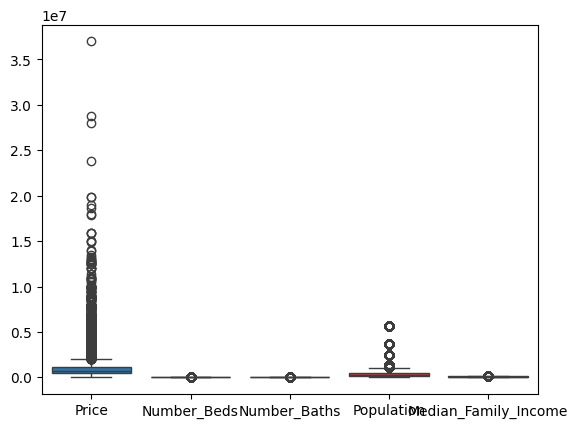

In [10]:
# Check for outliers
sns.boxplot(data=data[['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income']])
plt.show()

In [11]:
# Check for infinity or very large values
large_values_cols = []
for col in data.columns:
    if data[col].dtype in [np.float64, np.int64]:
        if (data[col].abs() > 1e10).any():
            large_values_cols.append(col)

print("Columns with very large values (>1e10):", large_values_cols)


Columns with very large values (>1e10): []


In [12]:
# Feature Engineering
data['Price_per_Bedroom'] = data['Price'] / data['Number_Beds']


In [13]:
# Replace very large values in 'Price_per_Bedroom' with the median value
median_price_per_bedroom = data['Price_per_Bedroom'].median()
data['Price_per_Bedroom'] = data['Price_per_Bedroom'].apply(lambda x: median_price_per_bedroom if x > 1e10 else x)

In [14]:
# Define categorical and numerical features
categorical_features = ['City', 'Province']
numerical_features = ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income', 'Price_per_Bedroom']


In [15]:
# Encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# Scale numerical features
numerical_transformer = StandardScaler()


In [16]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])


In [17]:
# Apply scaling to the 'Price_per_Bedroom' column
price_per_bedroom_scaler = StandardScaler()
data['Price_per_Bedroom_scaled'] = price_per_bedroom_scaler.fit_transform(data[['Price_per_Bedroom']])

In [18]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
processed_data = pipeline.fit_transform(data)

In [19]:
print(processed_data)

  (0, 38)	1.0
  (0, 51)	1.0
  (0, 54)	-0.16017731116224812
  (0, 55)	-0.163906466698614
  (0, 56)	-0.38807976839474945
  (0, 57)	4.474679497031687
  (0, 58)	0.6063950758917838
  (0, 59)	-0.14767470751371356
  (1, 38)	1.0
  (1, 51)	1.0
  (1, 54)	-0.14047426570462895
  (1, 55)	-0.163906466698614
  (1, 56)	-1.117000482354913
  (1, 57)	4.474679497031687
  (1, 58)	0.6063950758917838
  (1, 59)	-0.12346062076554885
  (2, 38)	1.0
  (2, 51)	1.0
  (2, 54)	-0.1405713153837326
  (2, 55)	-0.7417308803469508
  (2, 56)	-0.38807976839474945
  (2, 57)	4.474679497031687
  (2, 58)	0.6063950758917838
  (2, 59)	0.3582562208853009
  (3, 38)	1.0
  :	:
  (35764, 59)	3.9654310970989193
  (35765, 9)	1.0
  (35765, 50)	1.0
  (35765, 54)	-0.5130852351755273
  (35765, 55)	-0.7417308803469508
  (35765, 56)	-0.38807976839474945
  (35765, 57)	-0.1826215165812445
  (35765, 58)	-0.2382179035222297
  (35765, 59)	-0.32844607507240414
  (35766, 9)	1.0
  (35766, 50)	1.0
  (35766, 54)	0.0064736529551337125
  (35766, 55)	-0.1

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_data, data['Price'], test_size=0.2, random_state=42)


In [21]:
# Categorical features used in training
print("Categorical Features:")
print(categorical_features)

# Numerical features used in training
print("Numerical Features:")
print(numerical_features)


Categorical Features:
['City', 'Province']
Numerical Features:
['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income', 'Price_per_Bedroom']


In [22]:
# Create a new dataset by taking one fourth of the original dataset
new_data_indices = data.sample(frac=0.25, random_state=42).index

# Convert csr_matrix objects back to pandas DataFrames
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test)

X_train_new = X_train[~X_train_df.index.isin(new_data_indices)]
X_test_new = X_test[~X_test_df.index.isin(new_data_indices)]
y_test_new = y_test[~y_test.index.isin(new_data_indices)]


In [23]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)

In [24]:
# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)

In [25]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)

In [26]:
# Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_rmse = mean_squared_error(y_test, elastic_net_pred, squared=False)

In [27]:
# Artificial Neural Network (ANN)
ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_rmse = mean_squared_error(y_test, ann_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Compare the performance of different models
print("Linear Regression RMSE:", linear_reg_rmse)
print("Lasso Regression RMSE:", lasso_reg_rmse)
print("Ridge Regression RMSE:", ridge_reg_rmse)
print("Elastic Net RMSE:", elastic_net_rmse)
print("ANN RMSE:", ann_rmse)

Linear Regression RMSE: 3.7314275959325163
Lasso Regression RMSE: 162.614061233634
Ridge Regression RMSE: 659.81531770493
Elastic Net RMSE: 284429.0421309632
ANN RMSE: 207807.1543604965


In [29]:
# Evaluate models using appropriate metrics
def evaluate_models(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

In [30]:
# Calculate evaluation metrics for each model
linear_reg_metrics = evaluate_models(y_test, linear_reg_pred, "Linear Regression")
lasso_reg_metrics = evaluate_models(y_test, lasso_reg_pred, "Lasso Regression")
ridge_reg_metrics = evaluate_models(y_test, ridge_reg_pred, "Ridge Regression")
elastic_net_metrics = evaluate_models(y_test, elastic_net_pred, "Elastic Net")
ann_metrics = evaluate_models(y_test, ann_pred, "ANN")

In [34]:
# Initialize an empty dictionary to store MSE values for all models
mse_values_all = {}

# Calculate MSE for each model
for model_name, predictions in [("Linear Regression", linear_reg_pred),
                                 ("Lasso Regression", lasso_reg_pred),
                                 ("Ridge Regression", ridge_reg_pred),
                                 ("Elastic Net", elastic_net_pred),
                                 ("ANN", ann_pred)]:
    mse_all = mean_squared_error(y_test, predictions)
    mse_values_all[model_name] = mse_all

# Print MSE values for all models
for model_name, mse_all in mse_values_all.items():
    print(f"{model_name} MSE:", mse_all)


Linear Regression MSE: 13.923551903686718
Lasso Regression MSE: 26443.332910896068
Ridge Regression MSE: 435356.2534780576
Elastic Net MSE: 80899880007.53723
ANN MSE: 43183813403.40722


In [31]:
# Combine metrics into a list
all_metrics = [linear_reg_metrics, lasso_reg_metrics, ridge_reg_metrics, elastic_net_metrics, ann_metrics]


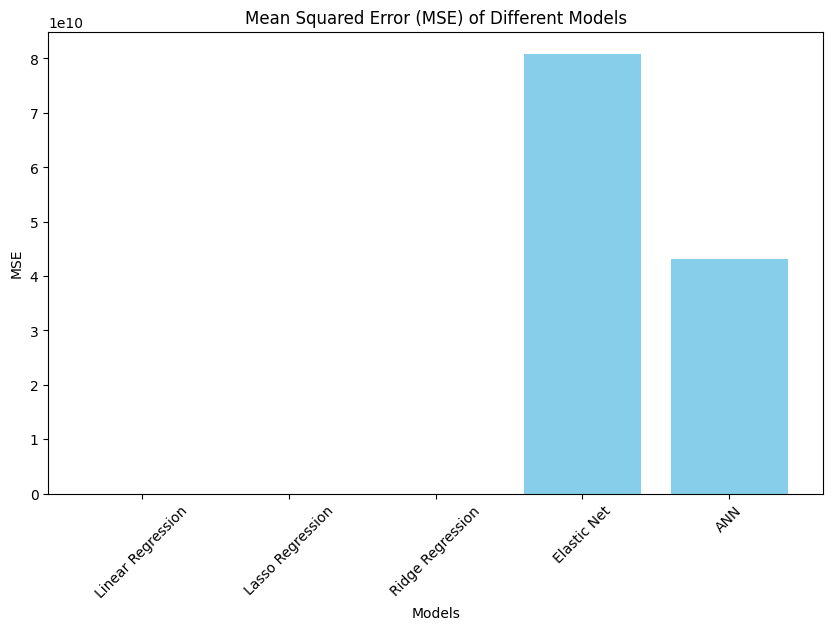

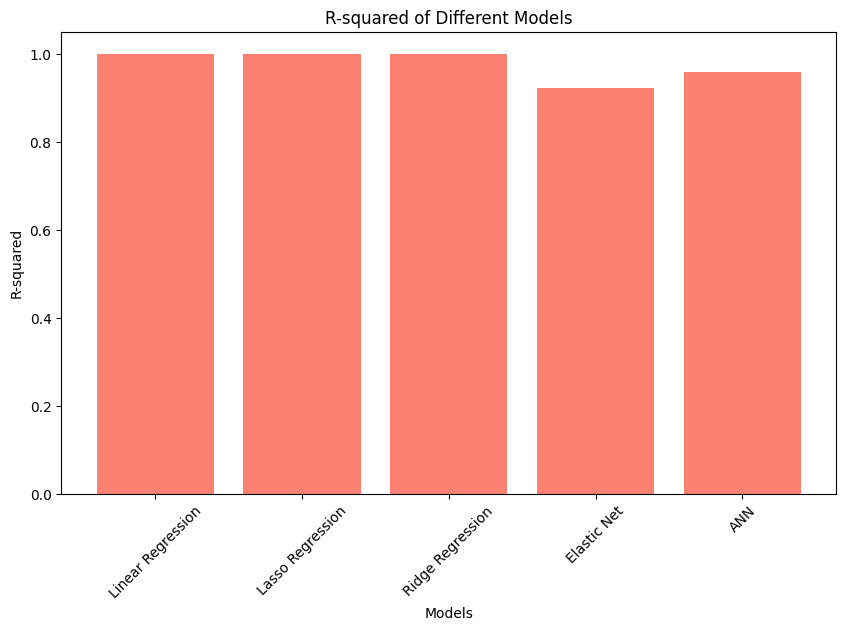

In [32]:
# Create visualizations to compare the performance of the different models
metrics_df = pd.DataFrame(all_metrics)
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MSE'], color='skyblue')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R-squared'], color='salmon')
plt.title('R-squared of Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()


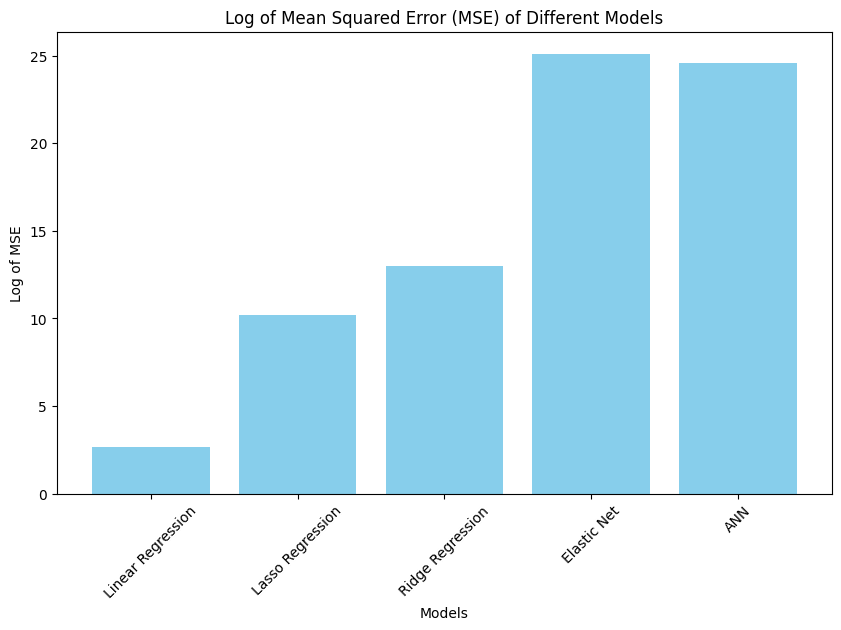

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'all_metrics' is a dictionary containing your models and their MSE values
metrics_df = pd.DataFrame(all_metrics)

plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], np.log(metrics_df['MSE']), color='skyblue')  # Apply np.log to 'metrics_df['MSE']'
plt.title('Log of Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('Log of MSE')  # Change label to 'Log of MSE'
plt.xticks(rotation=45)
plt.show()


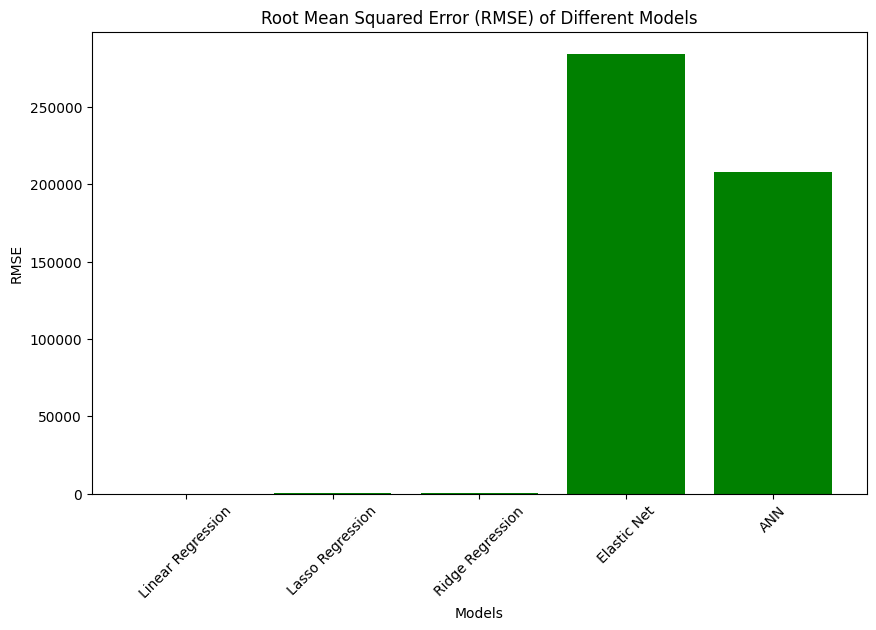

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], np.sqrt(metrics_df['MSE']), color='green')
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate and print the accuracy of predictions for each model
print("Accuracy of Predictions:")
print("Linear Regression R-squared:", r2_score(y_test, linear_reg_pred))
print("Lasso Regression R-squared:", r2_score(y_test, lasso_reg_pred))
print("Ridge Regression R-squared:", r2_score(y_test, ridge_reg_pred))
print("Elastic Net R-squared:", r2_score(y_test, elastic_net_pred))
print("ANN R-squared:", r2_score(y_test, ann_pred))


Accuracy of Predictions:
Linear Regression R-squared: 0.9999999999865142
Lasso Regression R-squared: 0.9999999743881695
Ridge Regression R-squared: 0.9999995783333879
Elastic Net R-squared: 0.9216439914557761
ANN R-squared: 0.9530249697473044


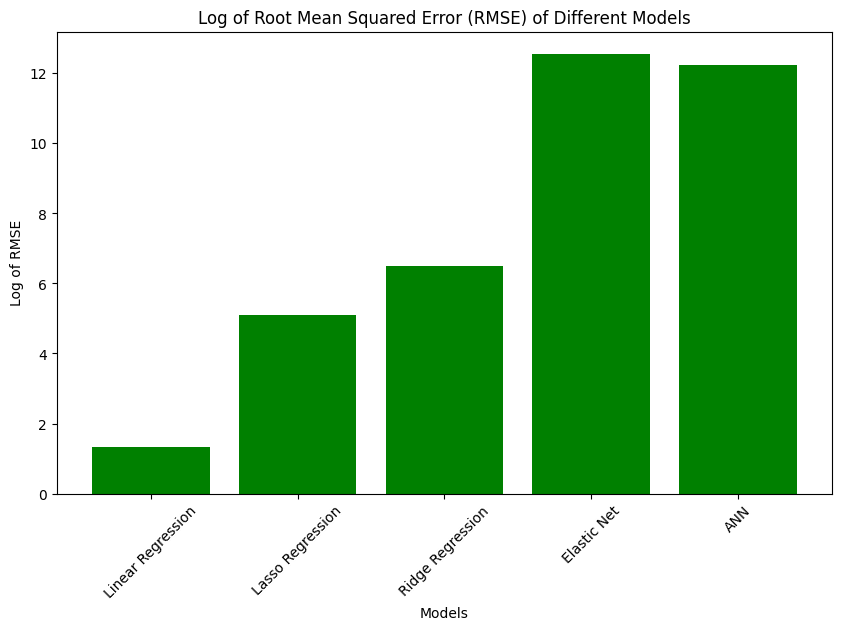

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], np.log(metrics_df['RMSE']), color='green')  # Apply np.log to 'metrics_df['RMSE']'
plt.title('Log of Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('Log of RMSE')  # Change label to 'Log of RMSE'
plt.xticks(rotation=45)
plt.show()


In [37]:
# Model Selection: Choose the best-performing model based on the evaluation metrics
best_model = metrics_df.loc[metrics_df['MSE'].idxmin()]
print("Best-performing model based on MSE:")
print(best_model)

Best-performing model based on MSE:
Model        Linear Regression
MSE                  13.923552
RMSE                  3.731428
R-squared                  1.0
Name: 0, dtype: object


In [38]:
# Another way to select the best-performing model is based on R-squared
best_model_r2 = metrics_df.loc[metrics_df['R-squared'].idxmax()]
print("\nBest-performing model based on R-squared:")
print(best_model_r2)


Best-performing model based on R-squared:
Model        Linear Regression
MSE                  13.923552
RMSE                  3.731428
R-squared                  1.0
Name: 0, dtype: object


In [39]:
# Save the encoder object
pickle.dump(categorical_transformer, open("encoder.pkl", "wb"))


In [40]:
# Save the best-performing model as a pickle file
best_model = metrics_df.loc[metrics_df['MSE'].idxmin()]['Model']
if best_model == "Linear Regression":
    pickle.dump(linear_reg, open("best_model.pkl", "wb"))
elif best_model == "Lasso Regression":
    pickle.dump(lasso_reg, open("best_model.pkl", "wb"))
elif best_model == "Ridge Regression":
    pickle.dump(ridge_reg, open("best_model.pkl", "wb"))
elif best_model == "Elastic Net":
    pickle.dump(elastic_net, open("best_model.pkl", "wb"))
elif best_model == "ANN":
    pickle.dump(ann, open("best_model.pkl", "wb"))

In [41]:
# Load the best-performing model from the pickle file
best_model_loaded = pickle.load(open("best_model.pkl", "rb"))

In [42]:
print(best_model_loaded)

LinearRegression()


In [ ]:
best_model_loaded.predict(X_test)

array([2199000.86680643,  929002.40220167, 2299797.48956382, ...,
        284004.19354129, 1698997.16056965, 1698998.64662285])

In [43]:
# Use the selected model to make predictions on the new dataset
predictions_new = best_model_loaded.predict(X_test_new)

In [45]:
# Extract the indices from the DataFrame X_test_df
X_test_indices = X_test_df.index

# Filter indices that are present in X_test_indices but not in new_data_indices
test_indices_to_keep = [index for index in X_test_indices if index not in new_data_indices]

# Check if test_indices_to_keep is not empty
if test_indices_to_keep:
    # Filter y_test and predictions_new based on the filtered indices
    y_test_new = y_test.iloc[test_indices_to_keep]
    predictions_new = predictions_new[:len(y_test_new)]

    # Evaluate the model's performance on the unknown data using appropriate metrics
    mse_new = mean_squared_error(y_test_new, predictions_new)
    rmse_new = np.sqrt(mse_new)
    r2_new = r2_score(y_test_new, predictions_new)

    print("Performance on Unknown Data:")
    print("MSE:", mse_new)
    print("RMSE:", rmse_new)
    print("R-squared:", r2_new)
else:
    print("No test indices to evaluate. Ensure that the test dataset and new dataset are different.")

Performance on Unknown Data:
MSE: 14.604629788549083
RMSE: 3.8216004224080105
R-squared: 0.999999999985637


In [46]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the encoder object and the best-performing model
encoder = pickle.load(open("encoder.pkl", "rb"))
best_model = pickle.load(open("best_model.pkl", "rb"))

# Load the dataset
data = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding='ISO-8859-1')

# Define categorical and numerical features
categorical_features = ['City', 'Province']
numerical_features = ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Median_Family_Income', 'Price_per_Bedroom']

# Fit the encoder on the dataset
encoder.fit(data[categorical_features])

# Function to preprocess input data
def preprocess_input(input_data):
    # Encode categorical features
    encoded_features = encoder.transform(input_data[categorical_features])
    # Scale numerical features
    numerical_data = input_data[numerical_features]
    scaled_numerical_data = (numerical_data - numerical_data.mean()) / numerical_data.std()  # Standardization
    # Combine encoded and scaled numerical features
    processed_input = np.hstack((encoded_features.toarray(), scaled_numerical_data))
    return processed_input

# Function to predict house prices
def predict_price(input_data):
    processed_input = preprocess_input(input_data)
    predicted_price = best_model.predict(processed_input.reshape(1, -1))
    return predicted_price[0]

# Create a Streamlit UI
st.title("House Price Prediction")

# Collect input features from the user
city = st.selectbox("City", data['City'].unique())
province = st.selectbox("Province", data['Province'].unique())
price = st.number_input("Price", value=0)
number_beds = st.number_input("Number of Bedrooms", value=1)
number_baths = st.number_input("Number of Bathrooms", value=1)
population = st.number_input("Population", value=0)
median_family_income = st.number_input("Median Family Income", value=0)
price_per_bedroom = price / number_beds if number_beds != 0 else 0

# Create a dictionary with user input
user_input = {
    'City': city,
    'Province': province,
    'Price': price,
    'Number_Beds': number_beds,
    'Number_Baths': number_baths,
    'Population': population,
    'Median_Family_Income': median_family_income,
    'Price_per_Bedroom': price_per_bedroom
}

# Predict house price when the user clicks the button
if st.button("Predict"):
    # Convert the user input into a DataFrame
    input_df = pd.DataFrame([user_input])
    # Predict the house price
    predicted_price = predict_price(input_df)
    # Display the predicted price
    st.success(f"Predicted House Price: ${predicted_price:.2f}")


Writing app.py


In [48]:
!wget -q -O - ipv4.icanhazip.com

34.106.202.165


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.202.165:8501

npx: installed 22 in 8.261s
your url is: https://some-deer-invite.loca.lt
